In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_raw = pd.read_csv(
    "../Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
dtype={"total_homes_sold": "Int32", "region_name": "category"})

In [3]:
housing_raw.columns

Index(['region_name', 'period_begin', 'period_end', 'total_homes_sold',
       'inventory', 'active_listings', 'age_of_inventory',
       'median_active_list_price', 'months_of_supply'],
      dtype='object')

In [4]:
ca_housing = (housing_raw
    .loc[(housing_raw["region_name"]
    .str.contains("CA"))]
    #deleting the last 11 spaces in "region_name"(i.e."County,GA")
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .set_index("period_begin").sort_index() # setting different index and sorting it
)

In [5]:
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [9]:
small_ca_housing=ca_housing.loc[ca_housing["region_name"].str.contains("San Francisco|Los Angeles|San Diego")]

In [10]:
ca_housing_pivot= small_ca_housing.pivot_table(index="region_name",
                                              values= "median_active_list_price")
ca_housing_pivot.head()

,median_active_list_price
region_name,
Los Angeles,7.682253e+05
San Diego,7.168183e+05
San Francisco,1.358263e+06


<BarContainer object of 3 artists>

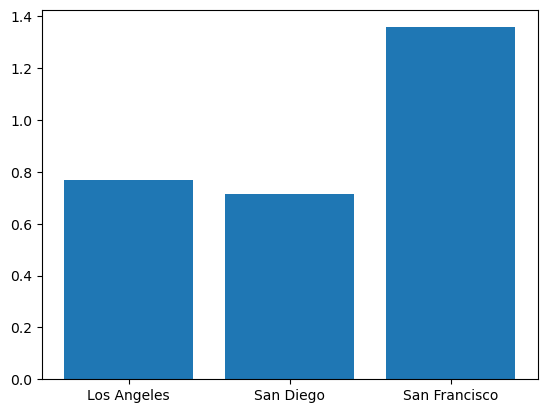

In [16]:
fig,ax=plt.subplots()
ax.bar(ca_housing_pivot.index,ca_housing_pivot["median_active_list_price"]/1000000 )

### demo on horizontal bar charts, how to reverse the order

<BarContainer object of 5 artists>

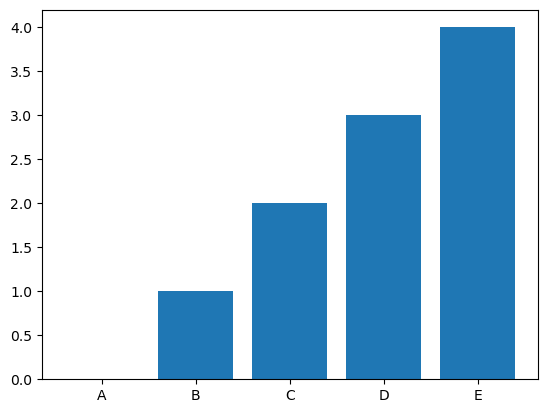

In [20]:
# first as a bar chart
fig,ax=plt.subplots()

labels=["E", "D", "C", "B","A"]
data=[0,1,2,3,4]

ax.bar(labels,data)

<BarContainer object of 5 artists>

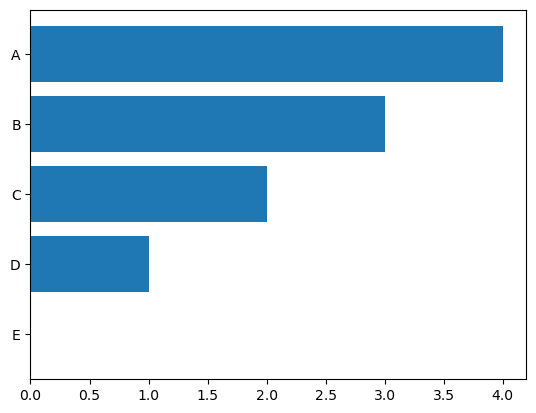

In [18]:
# horizontal bar, note the order
fig,ax=plt.subplots()

labels=["E", "D", "C", "B", "A"]
data=[0,1,2,3,4]

ax.barh(labels,data)

<BarContainer object of 5 artists>

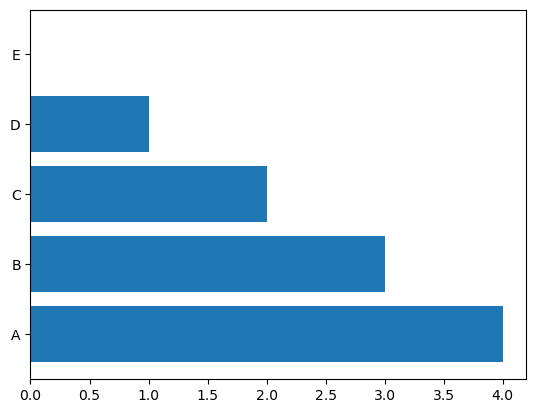

In [22]:
# to reverse the order,slice it
fig,ax=plt.subplots()

labels=["E", "D", "C", "B", "A"][::-1]
data=[0,1,2,3,4][::-1]

ax.barh(labels,data)

### back to housing

In [23]:
total_sold=(ca_housing
           .groupby("region_name")#group by the regions
           .agg({"total_homes_sold":"sum"})# aggregate the sum of total homes sold
           .sort_values("total_homes_sold", ascending=False)# sort from hisghest to lowest
           .iloc[:10])#pull the top 10

In [24]:
total_sold

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
Riverside,2335243
Orange,2004799
San Bernardino,1705727
Sacramento,1256838
Santa Clara,967707
Alameda,925469
Contra Costa,921039


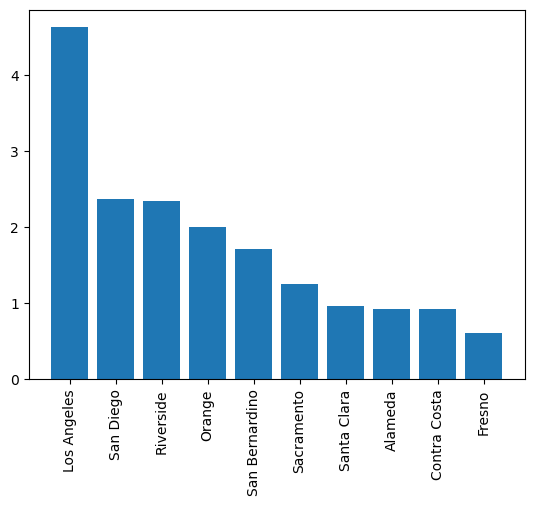

In [27]:

fig,ax=plt.subplots()

ax.bar(total_sold.index, total_sold['total_homes_sold']/1000000
      )

ax.xaxis.set_tick_params(rotation=90)

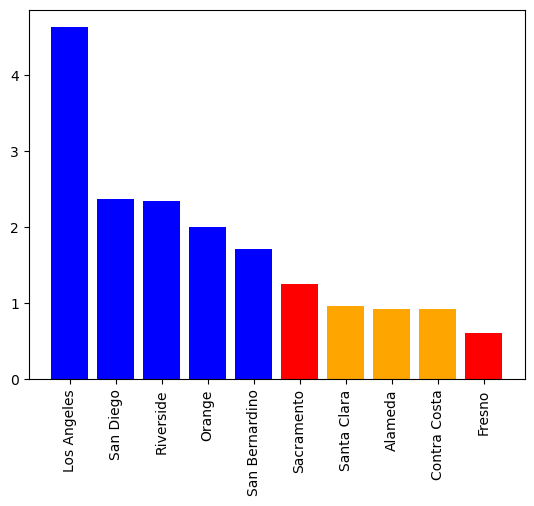

In [28]:
# to add color to the bars!
fig,ax=plt.subplots()

colors=[
    "blue",
    "blue",
    "blue",
    "blue",
    "blue",
    "red",
    "orange",
    "orange",
    "orange",
    "red",
]

ax.bar(total_sold.index, total_sold['total_homes_sold']/1000000,
       color=colors
      )

ax.xaxis.set_tick_params(rotation=90)

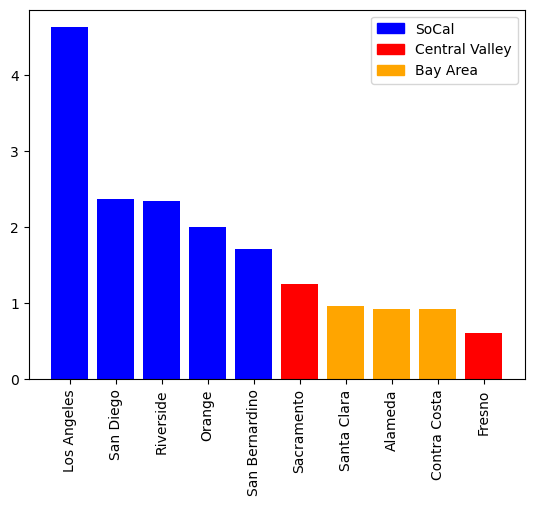

In [30]:
# to add a custom legend, first import mpatches
import matplotlib.patches as mpatches

fig,ax=plt.subplots()

colors=[
    "blue",
    "blue",
    "blue",
    "blue",
    "blue",
    "red",
    "orange",
    "orange",
    "orange",
    "red",
]

ax.bar(total_sold.index, total_sold['total_homes_sold']/1000000,
       color=colors
      )
# this creates a legend that is not connected to the chart
#the variables
socal=mpatches.Patch(color="blue", label="SoCal")
central=mpatches.Patch(color="red", label="Central Valley")
bay=mpatches.Patch(color="orange", label="Bay Area")
#calling the legend
plt.legend(handles=[socal,central,bay], loc="upper right")

ax.xaxis.set_tick_params(rotation=90)